In [46]:
import pandas as pd
import numpy as np
import json as js
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import warnings
import plotly.express as px
px_tempelate = 'simple_white'


%matplotlib inline

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [50]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [51]:
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

The data has 70692 rows and 22 columns


<function matplotlib.pyplot.show(close=None, block=None)>

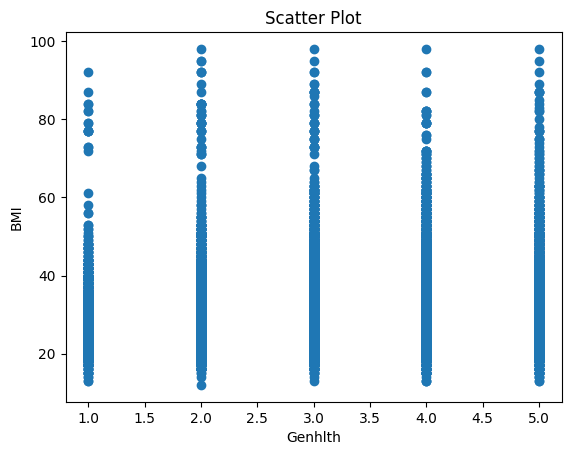

In [52]:
plt.scatter(data['GenHlth'],data['BMI'])

plt.title("Scatter Plot")
plt.xlabel("Genhlth")
plt.ylabel("BMI")
plt.show

<Axes: title={'center': 'Correlation with Diabetes Prediction'}>

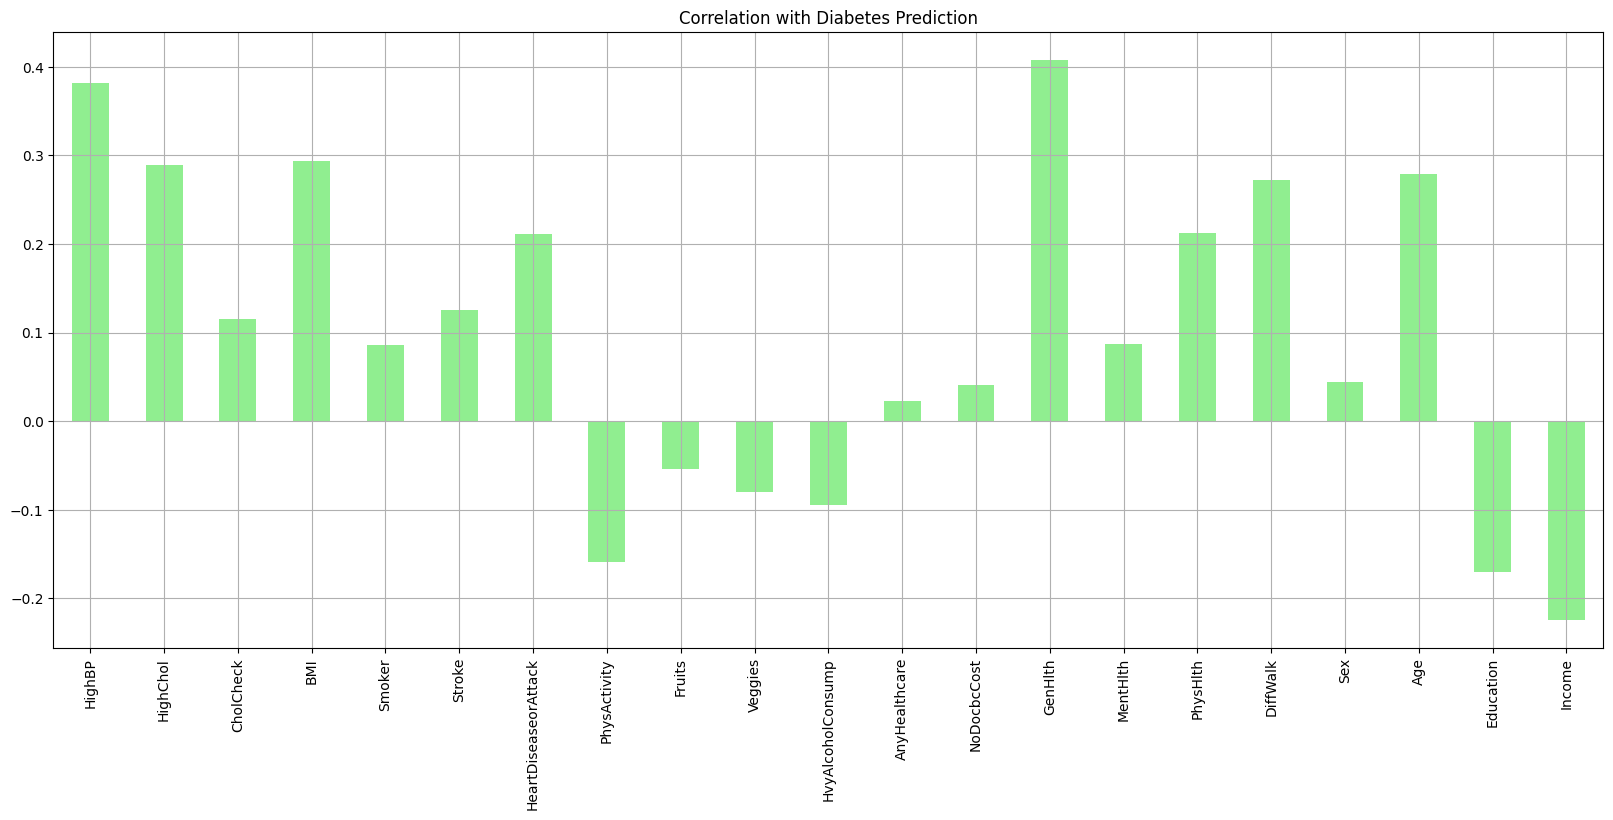

In [53]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Prediction", color = 'lightgreen')

In [56]:
colums_to_drop = ['Income','Education','DiffWalk','PhysHlth','GenHlth','NoDocbcCost','AnyHealthcare','Fruits','Veggies']
data.drop(columns=colums_to_drop,inplace=True)

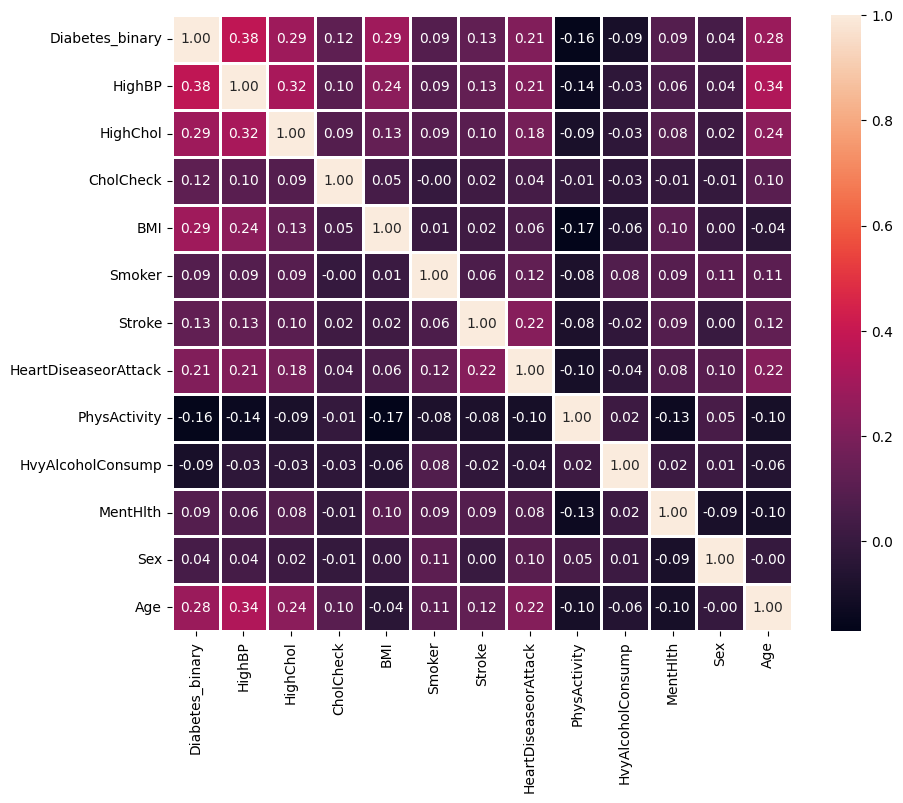

In [58]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,annot=True,linewidths = 0.8,fmt='.2f')


Visualizing the value count of Diabetes_binary using countplot

([<matplotlib.patches.Wedge at 0x7ea354de0e20>,
 [Text(6.735557395310444e-17, 1.1, 'non-Diabetic'),
  Text(-2.0206672185931328e-16, -1.1, 'Diabetic')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

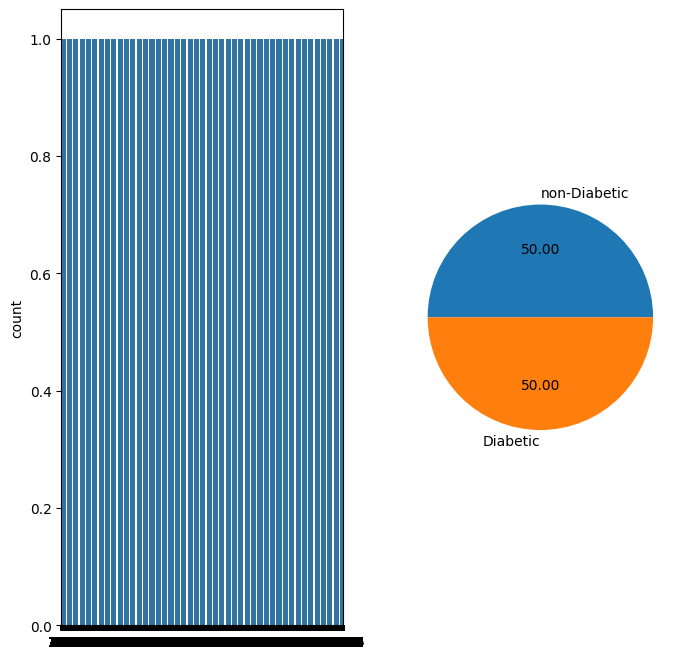

In [54]:
figure1, plot1 =  plt.subplots(1,2,figsize=(8,8))
sns.countplot(data['Diabetes_binary'],ax = plot1[0])

labels = ["non-Diabetic","Diabetic"]
plt.pie(data["Diabetes_binary"].value_counts(),labels = labels,autopct='%0.2f')


([<matplotlib.patches.Wedge at 0x7ea3779bb7c0>,
 [Text(-0.2178466729090489, 1.0782127930526786, 'non HighBP'),
  Text(0.21784667290904905, -1.0782127930526784, 'HighBP')],
 [Text(-0.1188254579503903, 0.5881160689378245, '56.35'),
  Text(0.11882545795039037, -0.5881160689378245, '43.65')])

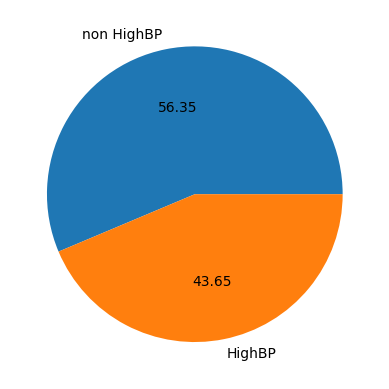

In [55]:
labels = ['non HighBP','HighBP']
plt.pie(data["HighBP"].value_counts(),labels = labels,autopct='%0.2f')

Checking the relation between diabetes_binary and HighBP

In [ ]:
pd.crosstab(data.HighBP,data.Diabetes_binary).plot(kind='bar',figsize = (5,4))
plt.title('Relation between HighBP and Diabetes_binary')
plt.xlabel('HighBP')
plt.ylabel('Diabetes_binary')

Checking the average of HighBp and No HighBP

In [ ]:
labels = ["Non HighBP","HighBP"]
plt.pie(data["HighBP"].value_counts(),labels = labels,autopct='%0.2f')

In [ ]:
(data.groupby(["HighBP","HighChol"])["Diabetes_binary"].value_counts()/data.groupby(["HighBP"])["Diabetes_binary"].count())*100

CORRElATION MATRIX

In [ ]:
columns_to_drop = ['Income','Eduction','Veggies','Fruits','AnyHealthcare','Education','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk']
data.drop(columns = columns_to_drop, inplace=True)

# Diabetes Prediction

In [ ]:
x = data[['BMI','HighBP']]
y = data[['Diabetes_binary']]

In [ ]:
#Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

In [ ]:
new_bmi = float(input("Enter your BMI: "))
new_highbp = int(input("Enter 1 if High Blood Pressure or 0 if not : "))

new_data = scaler.transform([[new_bmi, new_highbp]])
prediction = model.predict(new_data)
if prediction[0] == 1:
    print("The person is diabetic.It is advisable that the sugar consumption should be limited and excercise daily")
else:
    print("The person is not diabetic.But the person should take steps towards healthy lifestyle")

# Smoking Prediction

In [ ]:
x = data[['Stroke','HeartDiseaseorAttack']]
y = data[['Smoker']]

In [ ]:
#Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)


In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

In [ ]:
new_stroke = float(input("Enter your BMI: "))
new_heartdis = int(input("Enter 1 if High Blood Pressure or 0 if not : "))

new_data = scaler.transform([[new_stroke, new_heartdis]])

prediction = model.predict(new_data)
if prediction[0] == 1:
    print("The person is smoker.It is advisable that the person reduce smoking and use support")
else:
    print("The person is not smoker.But the person should take steps towards healthy lifestyle")

# High Cholestrol Prediction

In [60]:
# Define features (X) and target variable (y)
X = data[['Stroke', 'HvyAlcoholConsump']]
y = data['HighChol']

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a logistic regression model (you can try other algorithms too)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [66]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5325694886484192
Confusion Matrix:
[[ 293 6359]
 [ 250 7237]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.04      0.08      6652
         1.0       0.53      0.97      0.69      7487

    accuracy                           0.53     14139
   macro avg       0.54      0.51      0.38     14139
weighted avg       0.54      0.53      0.40     14139



In [65]:
# Now, take user input for new data
new_stroke = float(input("Stroke; if yes 1, no 0: "))
new_HvyAlcoholConsump = float(input("Alcohol consumption is true then 1 otherwise 0: "))

# Make prediction for the new data
new_data = scaler.transform([[new_stroke, new_HvyAlcoholConsump]])

# Display the prediction and advice
prediction = model.predict(new_data)
if prediction[0] == 1:
    print("The model predicts that the person has high cholestrol. Advised have healthy diet and regular excercise.")
else:
    print("The model predicts that the person is may not have high cholestrol. Should have balanced diet and manage stress.")


Stroke; if yes 1, no 0: 0
Alcohol consumption is true then 1 otherwise 0: 0
The model predicts that the person has high cholestrol. Advised have healthy diet and regular excercise.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
